In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate  import solve_ivp
from scipy.optimize import minimize

r = 0.1

sigma = 1


def ODE(W, y):
    F, V = y

    F_update = V

    if V < 0:
        c = (V/2)**2
    else:
        c = 0

    a_orig = 2/5 + 4/25 * V + 2*F+2*c-2*V*W + 2*V*np.sqrt(c)

    a = a_orig * (a_orig > 0) + 0*(a_orig <= 0)

    upper = F - a + c - V*(W-np.sqrt(c)+a**2/2 + 2/5 * a)
    lower = r*(a+2/5)**2 * sigma**2/2

    V_update = upper/lower

    return [F_update, V_update]


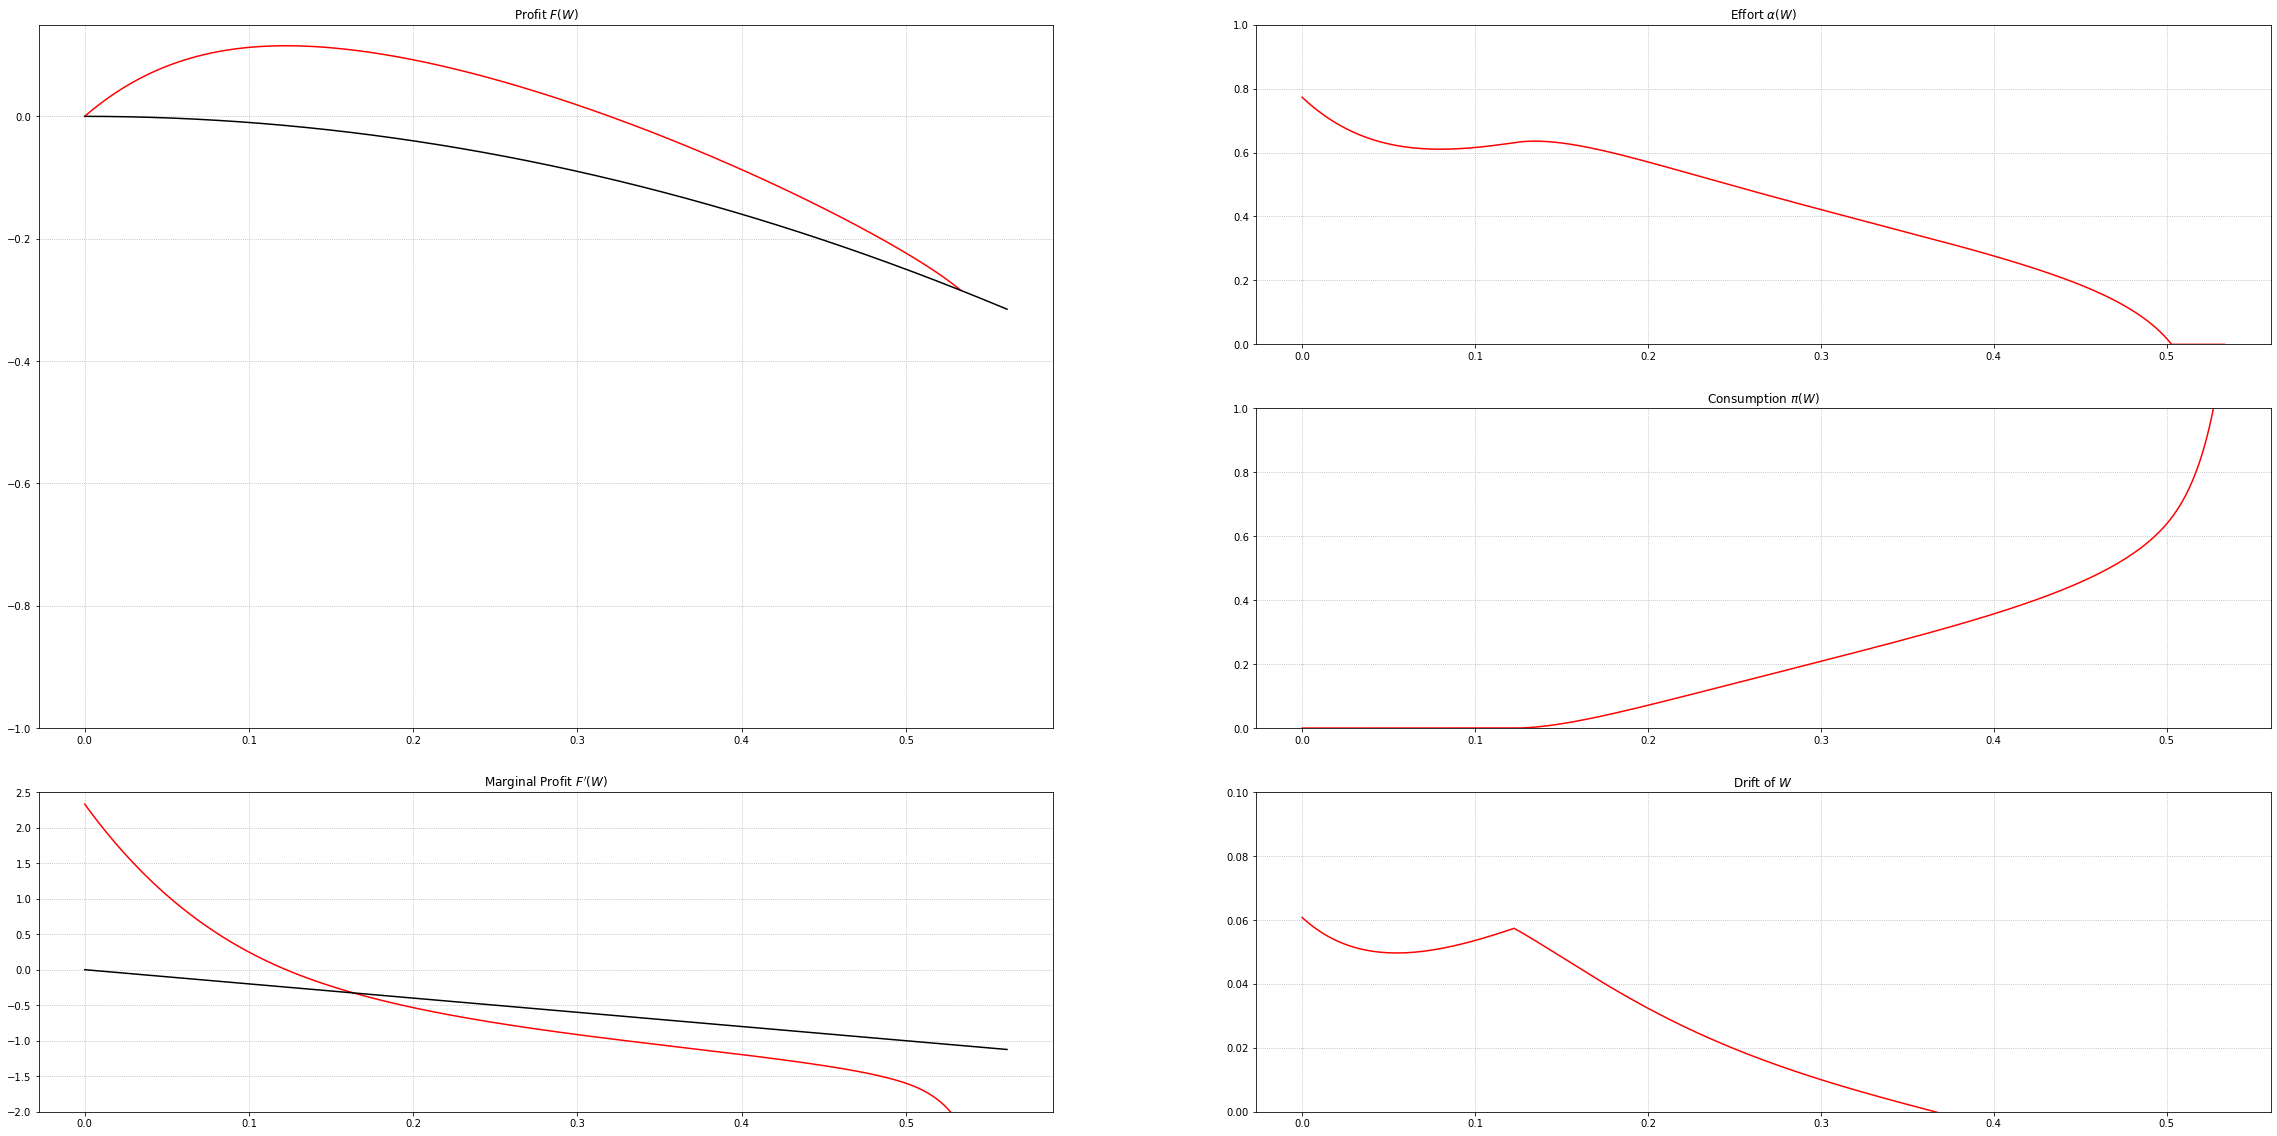

In [18]:

guess = 2.33

sol2 = solve_ivp(ODE, t_span=(0, 1), y0=[
    0, guess], method="DOP853", max_step=0.0001)
X_plot = sol2.t[sol2.y[0] >= -sol2.t**2]
ODE_F = sol2.y[0][sol2.y[0] >= -sol2.t**2]
ODE_V = sol2.y[1][sol2.y[0] >= -sol2.t**2]




c_orig = (ODE_V/2)**2 * (ODE_V < 0)

c = c_orig

a_orig = 2/5 + 4/25 * ODE_V + 2*ODE_F + \
    2*c-2*ODE_V*X_plot + 2*ODE_V*np.sqrt(c)

a = a_orig * (a_orig > 0) + 0*(a_orig <= 0)


ODE_a = a

upper = ODE_F - a + c - ODE_V*(X_plot-np.sqrt(c)+a**2/2 + 2/5 * a)
lower = r*(a+2/5)**2 * sigma**2/2

V_update = upper/lower


ODE_c = c
B_W = r*(X_plot-ODE_c**(1/2)+ODE_a**2/2+2*ODE_a/5)
ODE_drift = B_W



figwidth = 10

fig, axs = plt.subplot_mosaic(

    [["left column", "right top"],
     ["left column", "right mid"],
        ["left down", "right down"]], figsize=(4 * figwidth, 2 * figwidth)

)


axs["left column"].plot(X_plot, ODE_F, color='red')
axs["left column"].set_ylim(-1, 0.15)
axs["left column"].plot(sol2.t, -sol2.t**2, color='black')
axs["left column"].set_title("Profit $F(W)$")
axs["left column"].grid(linestyle=':')

axs["left down"].plot(X_plot, ODE_V, color='red')
axs["left down"].set_ylim(-2, 2.5)
axs["left down"].plot(sol2.t, -2 * sol2.t, color='black')
axs["left down"].set_title("Marginal Profit $F'(W)$")
axs["left down"].grid(linestyle=':')

axs["right top"].plot(X_plot, ODE_a, color='red')
axs["right top"].set_ylim(0, 1)
axs["right top"].set_title("Effort $\\alpha(W)$")
axs["right top"].grid(linestyle=':')

axs["right mid"].plot(X_plot, ODE_c, color='red')
axs["right mid"].set_ylim(0, 1)
axs["right mid"].set_title("Consumption $\\pi(W)$")
axs["right mid"].grid(linestyle=':')

axs["right down"].plot(X_plot, ODE_drift, color='red')
axs["right down"].set_ylim(0, 0.1)
axs["right down"].set_title("Drift of $W$")
axs["right down"].grid(linestyle=':')


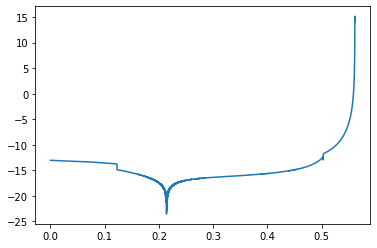

In [21]:
X_plot = sol2.t
ODE_F = sol2.y[0]
ODE_V = sol2.y[1]



ODE_X = X_plot[1:-1]
ODE_0dF = ODE_F[1:-1]
ODE_dF = (ODE_F[2:]-ODE_F[0:-2])/(2*(X_plot[2]-X_plot[1]))
ODE_ddF = (ODE_F[2:]+ODE_F[0:-2]-2*ODE_F[1:-1])/(X_plot[2]-X_plot[1])**2
ODE_X.shape, ODE_0dF.shape, ODE_dF.shape, ODE_ddF.shape

# ODE_error = V_update -

c_orig = (ODE_dF/2)**2 * (ODE_dF < 0)

c = c_orig

a_orig = 2/5 + 4/25 * ODE_dF + 2*ODE_0dF + \
    2*c-2*ODE_dF*ODE_X + 2*ODE_dF*np.sqrt(c)

a = a_orig * (a_orig > 0) + 0*(a_orig <= 0)

upper = ODE_0dF - a + c - ODE_dF*(ODE_X-np.sqrt(c)+a**2/2 + 2/5 * a)
lower = r*(a+2/5)**2 * sigma**2/2

ODE_error = upper/lower - ODE_ddF

plt.plot(ODE_X, np.log(abs(ODE_error)))



In [22]:
X_plot[-1]


0.5614695574637378

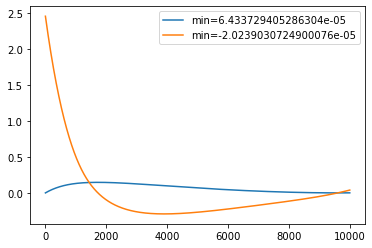

In [74]:
plt.plot(sol2.y[0] + sol2.t**2,
         label='min={}'.format((sol2.y[0] + sol2.t**2)[sol2.t > 0].min()))
index = (sol2.y[0] + sol2.t**2)[sol2.t>0].argmin()
plt.plot(sol2.y[1] + 2*sol2.t,
         label='min={}'.format((sol2.y[1] + 2*sol2.t)[sol2.t > 0][index]))
plt.legend()

In [100]:
def fun(guess):

    sol2 = solve_ivp(ODE, t_span=(0, 1), y0=[
        0, guess], method="DOP853", max_step=0.0001)

    if ((sol2.y[0] + sol2.t**2)[sol2.t > 0] >= 0).all():
        
        loss1 = (sol2.y[0] + sol2.t**2)[sol2.t > 0].min()
        
        loss1_index = (sol2.y[0] + sol2.t**2)[sol2.t > 0].argmin()
        
        loss2 = (sol2.y[1] + 2*sol2.t)[sol2.t > 0][loss1_index]
        
        loss = loss1**2+ loss2**2
        # loss = loss1**2 

    else: 
        
        loss = 1000
        
    return loss


res = minimize(fun, x0=2.4, method='Nelder-Mead', tol=1e-10)
res


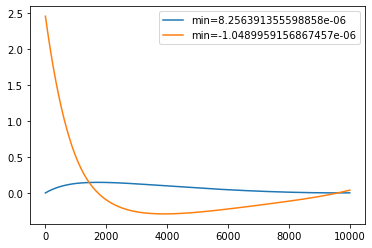

In [103]:
# res

# guess = 2.45856015775
guess = 2.45855177 #optimized
sol2 = solve_ivp(ODE, t_span=(0, 1), y0=[
    0, guess], method="DOP853", max_step=0.0001)
plt.plot(sol2.y[0] + sol2.t**2,
         label='min={}'.format((sol2.y[0] + sol2.t**2)[sol2.t > 0].min()))
index = (sol2.y[0] + sol2.t**2)[sol2.t > 0].argmin()
plt.plot(sol2.y[1] + 2*sol2.t,
         label='min={}'.format((sol2.y[1] + 2*sol2.t)[sol2.t > 0][index]))
plt.legend()
